In [2]:
import os 
os.getcwd()

'C:\\Users\\Alireza\\Desktop\\App'

In [3]:
import pandas as pd
import pandas_datareader as dr
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import pandas_datareader as dr
# Other Packages
import matplotlib.ticker as ticker
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, cophenet, ward
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from sklearn import metrics

In [4]:
dataset = pd.read_csv('dataset.csv')

In [5]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)

In [6]:
dataset.shape

(1258, 502)

In [7]:
dataset.tail()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,139.570007,14.31,193.600006,154.940002,140.800003,109.029999,73.839996,354.450012,598.750000,197.100006,...,90.419998,62.060001,101.910004,35.220001,112.639999,130.000000,120.559998,269.410004,44.000000,194.979996
2023-12-26,139.809998,14.11,193.050003,154.619995,138.720001,109.230003,73.510002,353.429993,598.260010,198.869995,...,91.000000,62.250000,102.139999,35.540001,113.620003,130.259995,121.419998,275.500000,44.880001,195.500000
2023-12-27,139.820007,13.99,193.149994,154.880005,136.550003,109.790001,73.540001,353.820007,596.080017,199.350006,...,90.629997,61.540001,101.660004,35.630001,114.379997,130.839996,121.129997,275.790009,44.509998,196.899994
2023-12-28,139.770004,13.98,193.580002,154.750000,137.000000,110.400002,74.059998,351.589996,595.520020,200.240005,...,91.760002,61.889999,100.190002,35.590000,114.320000,130.520004,121.629997,275.350006,44.660000,197.160004
2023-12-29,139.029999,13.74,192.529999,154.970001,136.139999,110.070000,74.269997,350.910004,596.599976,198.559998,...,91.110001,61.910000,99.980003,35.590000,114.360001,130.660004,121.699997,273.329987,43.869999,197.369995


In [8]:
missing_fraction = dataset.isnull().mean().sort_values(ascending=False)
missing_fraction

BRK.B    1.000000
BF.B     1.000000
VLTO     0.951510
KVUE     0.868045
GEHC     0.792528
           ...   
ES       0.000000
EQT      0.000000
EQR      0.000000
EQIX     0.000000
ZTS      0.000000
Length: 502, dtype: float64

In [9]:
drop_list = sorted(list(missing_fraction[missing_fraction > 0.1].index))
dataset.drop(labels = drop_list, axis = 1, inplace = True)

In [10]:
dataset.fillna(method = 'bfill', axis = 'index', inplace = True)

In [11]:
print("Null Values =",dataset.isnull().values.any())

Null Values = False


In [12]:
dataset.shape

(1258, 493)

In [13]:
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data = returns

In [14]:
data.head()

,Returns,Volatility
A,0.193515,0.293730
AAL,0.010167,0.612494
AAPL,0.369823,0.322428
ABBV,0.143741,0.255170
ABT,0.126928,0.263679


In [15]:
X = data

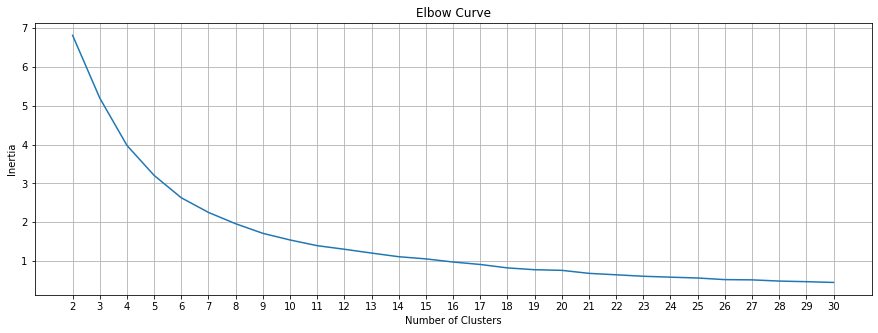

In [16]:
distortions = []
max_loop = 31

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distortions)
plt.xticks([i for i in range(2, max_loop)])
plt.grid(True)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

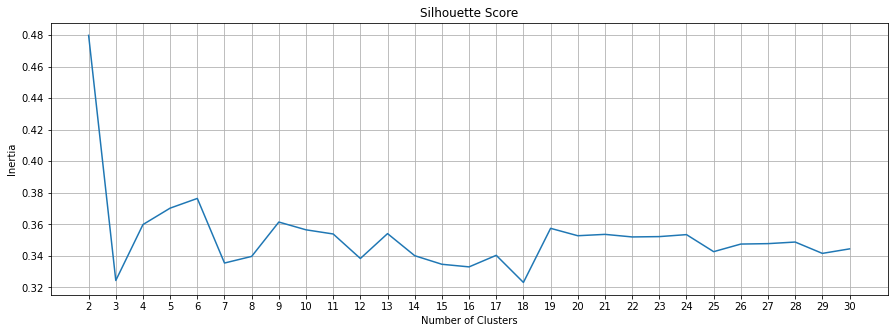

In [17]:
max_loop = 31
silhouette_score = []
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k, random_state = 5, n_init = 5)
    kmeans.fit(X)
    silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state = 10))


fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)])
plt.grid(True)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
nclusters = 8
# Fit with K-Means

k_means = cluster.KMeans(n_clusters = nclusters)
k_means.fit(X)

KMeans()

In [19]:
# Distinct colors for each cluster
cluster_colors = {0: '#FF0000', 1: '#FFFF00', 2: '#00FF00', 3: '#800080', 4:'#0000FF', 5:'#FFA500', 6:'#FFC0CB', 7:'#00FFFF'}

colors = [cluster_colors[label] for label in k_means.labels_]

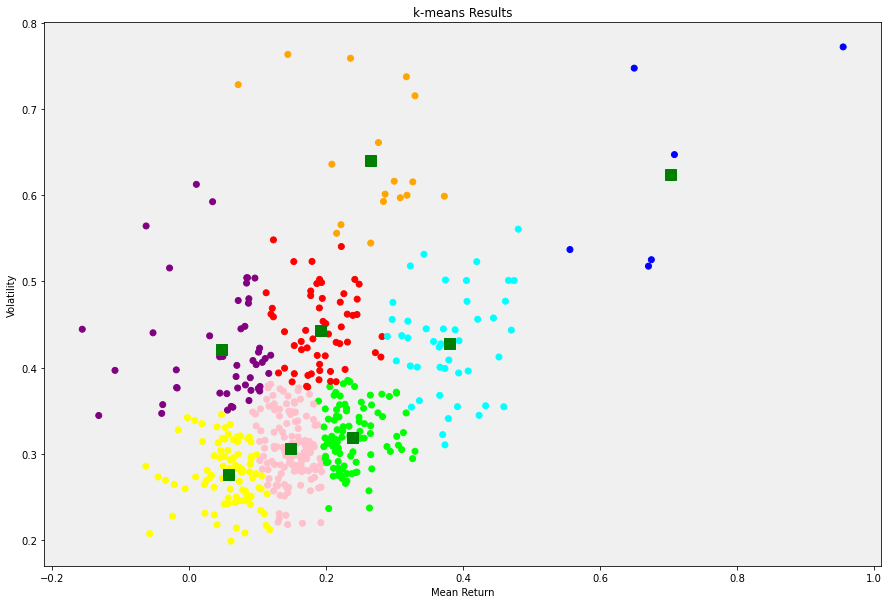

In [20]:
centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

ax.set_facecolor('#F0F0F0')
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, label=X.index)
ax.set_title('k-means Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')

plt.plot(centroids[:, 0], centroids[:, 1], 'sg', markersize=11)

plt.show()

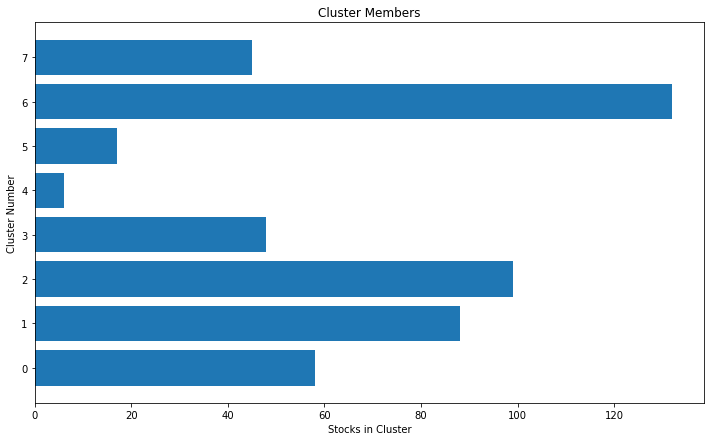

In [21]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())


clustered_series = clustered_series[clustered_series != -1]

# Get the sorted value counts
sorted_value_counts = clustered_series.value_counts().sort_index()

plt.figure(figsize=(12, 7))
plt.barh(
    range(len(sorted_value_counts)), 
    sorted_value_counts
)
plt.yticks(range(len(sorted_value_counts)), sorted_value_counts.index)
plt.title('Cluster Members')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [22]:
# Calculate Linkage
z = linkage(X, method = 'ward')

# Plot Dendogram
plt.figure(figsize = (10, 7))
plt.title('Stocks Dendogram')
plt.ylabel('linkage distance')
plt.xlabel('Clusters')
dendrogram(z, labels = X.index)
plt.savefig('dendrogram_plot.jpeg')
plt.show()

In [23]:
distance_threshold = 0.4
clusters = fcluster(z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])
chosen_clusters = chosen_clusters['cluster'].unique()
len(chosen_clusters)

15

In [24]:
nclust = 15
hc = AgglomerativeClustering(n_clusters = nclust, affinity = 'euclidean', linkage = 'ward')
hclabels = hc.fit_predict(X)

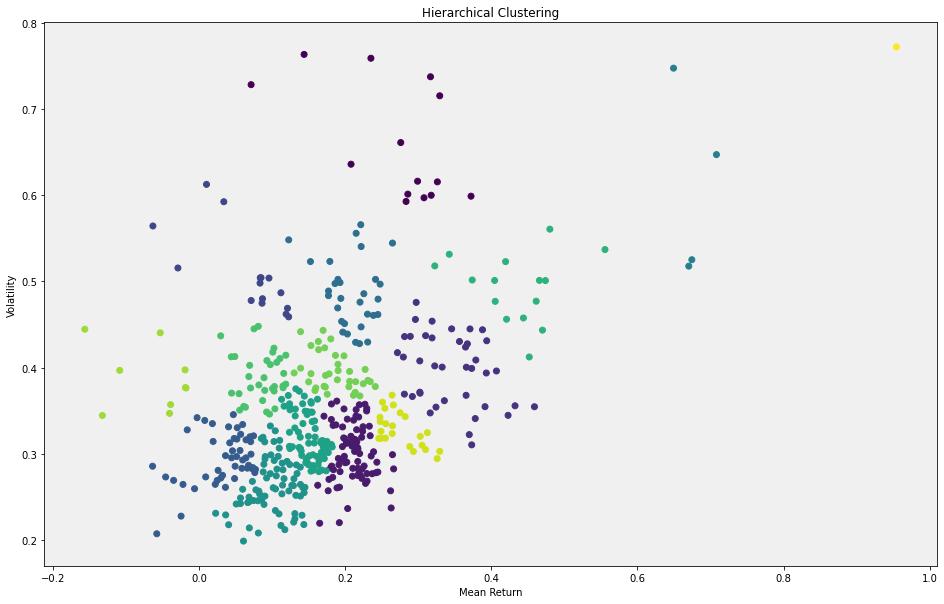

In [25]:
fig = plt. figure(figsize = (16, 10))

ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c = hclabels)
ax.set_facecolor('#F0F0F0')
ax.set_title("Hierarchical Clustering")
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.show()

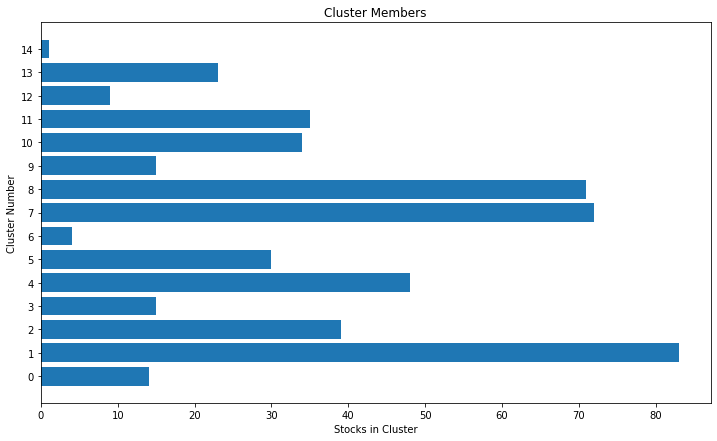

In [26]:
clustered_series = pd.Series(index=X.index, data=hc.fit_predict(X).flatten())


clustered_series = clustered_series[clustered_series != -1]

# Get the sorted value counts
sorted_value_counts = clustered_series.value_counts().sort_index()

plt.figure(figsize=(12, 7))
plt.barh(
    range(len(sorted_value_counts)), 
    sorted_value_counts
)
plt.yticks(range(len(sorted_value_counts)), sorted_value_counts.index)  # Set y-axis ticks to sorted cluster numbers
plt.title('Cluster Members')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [27]:
ap = AffinityPropagation()
ap.fit(X)
aplabels = ap.predict(X)

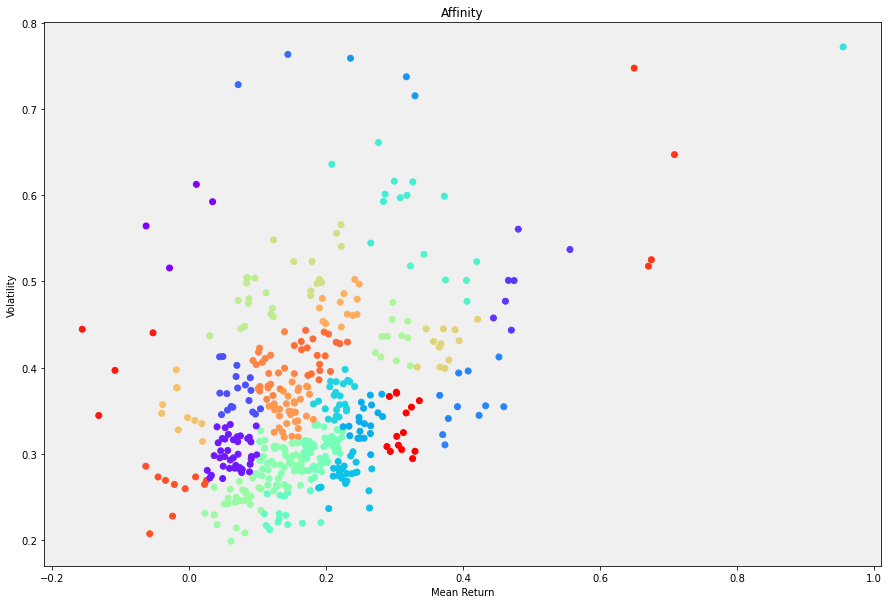

In [28]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = aplabels, cmap ="rainbow")
ax.set_facecolor('#F0F0F0')
ax. set_title( 'Affinity')
ax. set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.show()

Estimated number of clusters: 30


<Figure size 432x288 with 0 Axes>

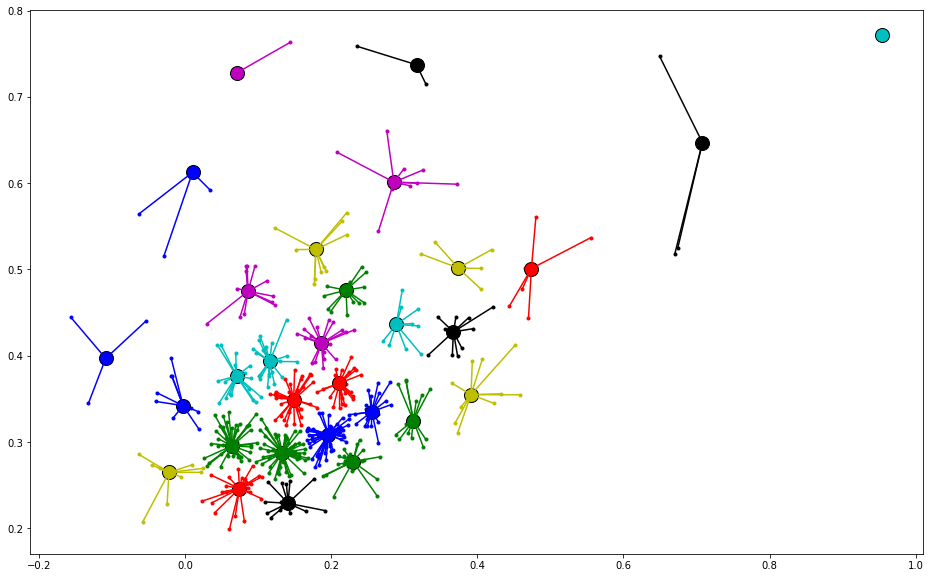

In [29]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
no_clusters = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % no_clusters)

# Assuming X is your data
X_temp = np.asarray(X)

plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(16, 10))

# Use a predefined list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for k, col in zip(range(no_clusters), cycle(colors)):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()


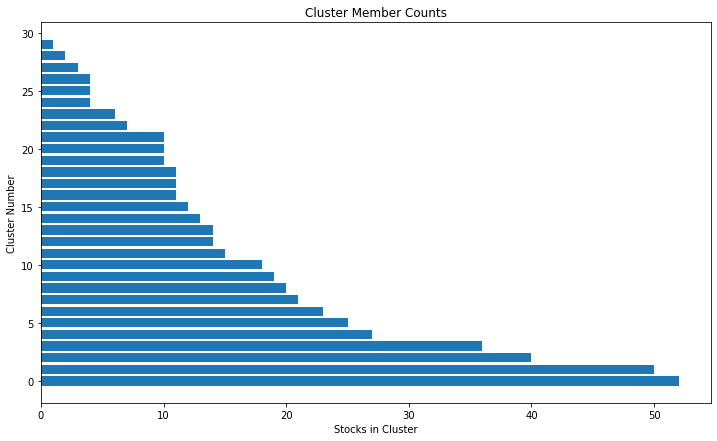

In [30]:
clustered_series_ap = pd.Series(index = X.index, data = ap.labels_.flatten())

clustered_series_all_ap = pd.Series(index = X.index, data = ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

plt.figure(figsize = (12, 7))
plt.barh(
    range (len(clustered_series_ap. value_counts())), 
    clustered_series_ap.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [31]:
from sklearn import metrics

print ("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print ("hc", metrics.silhouette_score(X, hc.fit_predict(X), metric= 'euclidean'))
print ("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.33983045769576586
hc 0.2948990647048868
ap 0.34231446487756517


In [32]:
def selectAssets(data, n_clusters = '', method = '', checkRet = 0):
    
    if method == 'km':
        k_means = cluster.KMeans(n_clusters = n_clusters, random_state = 42)
        k_means.fit(X)
        labels = k_means.predict(X)
    
    elif method == 'hc':
        hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
        labels = hc.fit_predict(X)
    
    else:
        ap = AffinityPropagation()
        ap.fit(X)
        labels = ap.predict(X)
    
    # Get the indices of the stocks in each cluster
    clusters = {}
    for i, label in enumerate(labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(i)

    # Build the portfolio by selecting the stock with the highest Sharpe ratio in each cluster
    portfolio = []
    for label, indices in clusters.items():
        max_sharpe_ratio = -1
        best_stock = None
        for i in indices:
            ret = data.iloc[i, 0]
            vol = data.iloc[i, 1]
            
            if checkRet == True:
                if ret > 0:
                    sharpe_ratio = ret / vol
                    if sharpe_ratio > max_sharpe_ratio:
                        max_sharpe_ratio = sharpe_ratio
                        best_stock = i
            else:
                sharpe_ratio = ret / vol
                if sharpe_ratio > max_sharpe_ratio:
                    max_sharpe_ratio = sharpe_ratio
                    best_stock = i
        portfolio.append(best_stock)

    return portfolio


In [33]:
portfolio = selectAssets(data, 5, 'km')
portfolio

[106, 449, 377, 477, 335]

In [34]:
X.iloc[portfolio, ]

,Returns,Volatility
COST,0.262934,0.237410
ULTA,0.230790,0.429682
PWR,0.459030,0.354729
WMT,0.129531,0.220997
NVDA,0.670262,0.517704


In [35]:
def EweightsPortfolio(dataset, data, n_clusters = '', method = '', checkRet = 0):
    
    portfolio = selectAssets(data, n_clusters, method, checkRet)

    portfolio = [x for x in portfolio if x is not None]
    
    Eweights = 1/len(portfolio)
    
    weights = np.full(shape = len(portfolio), fill_value = Eweights, dtype = np.float)
    
    RPMatrix = dataset.iloc[:,portfolio].pct_change()
    
    RPCovMatrix = RPMatrix.cov() * 252
    
    port_variance = np.dot(weights.T, np.dot(RPCovMatrix, weights))
    
    port_volatility = np.sqrt(port_variance)
    
    portfolioSimpleAnnualReturn = np.sum(RPMatrix.mean() * weights) * 252
    
    #Show the expected annual return, volatility (risk), and variance
    percent_var = str(round((port_variance * 100), 2)) + '%'
    percent_vols = str(round((port_volatility * 100), 2)) + '%'
    percent_ret = str(round((portfolioSimpleAnnualReturn * 100), 2)) + '%'
    
    print('Expected annual return: '+ percent_ret)
    print( 'Annual volatility / risk: '+ percent_vols)
    print ('Annual variance: '+ percent_var)

In [36]:
EweightsPortfolio(dataset, data, n_clusters = 15, method = 'km', checkRet = 0)

Expected annual return: 31.13%
Annual volatility / risk: 26.2%
Annual variance: 6.87%


In [37]:
EweightsPortfolio(dataset, data, n_clusters = 15, method = 'km', checkRet = 1)

Expected annual return: 33.48%
Annual volatility / risk: 26.4%
Annual variance: 6.97%


In [38]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import objective_functions
from pypfopt import plotting
from pypfopt.cla import CLA

In [39]:
def Portfolio_Optimization(portfolio = '', method = 'EfficientFrontier'):
    if portfolio == '':
        df = dataset
    else:
        portfolio = [x for x in portfolio if x is not None]
        df = dataset.iloc[:,portfolio]
    #Calculate the expected returns and the annualised sample covariance matrix of asset returns
    mu = expected_returns.mean_historical_return(df)
    S = risk_models.sample_cov(df)
    if method == 'CLA':
        ef = CLA(mu, S)
    else:
        ef = EfficientFrontier(mu, S)
    #optimize for max sharpe ratio
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    cleaned_weights = {asset: round(weight, 2) for asset, weight in weights.items() if weight > 0.0}
    print(cleaned_weights) 
    print('Number of Assets:',  len(cleaned_weights))
    ef.portfolio_performance(verbose = True)

In [40]:
def plot(portfolio = ''):
    if portfolio == '':
        df = dataset
    else:
        portfolio = [x for x in portfolio if x is not None]
        df = dataset.iloc[:,portfolio]
    mu = expected_returns.mean_historical_return(df)
    S = risk_models.sample_cov(df)
    ef = EfficientFrontier(mu, S)


    fig, ax = plt.subplots()
    ef_max_sharpe = ef.deepcopy()
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

    # Find the tangency portfolio
    ef_max_sharpe.max_sharpe()
    ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

    # Generate random portfolios
    n_samples = 10000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

    # Output
    ax.set_title("Efficient Frontier with random portfolios")
    ax.legend()
    plt.tight_layout()
    #plt.savefig("ef_scatter.png", dpi=200)
    plt.show()

In [41]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [219]:
def Discrete_Allocation(portfolio = '', portfolio_val= 5000, method = 'EfficientFrontier'):
    if portfolio == '':
        df = dataset
    else:
        portfolio = [x for x in portfolio if x is not None]
        df = dataset.iloc[:,portfolio]
    #Calculate the expected returns and the annualised sample covariance matrix of asset returns
    mu = expected_returns.mean_historical_return(df)
    S = risk_models. sample_cov(df)
    
    if method == 'CLA':
        ef = CLA(mu, S)
    else:
        ef = EfficientFrontier(mu, S)
    #optimize for max sharpe ratio
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    latest_prices = get_latest_prices(df)
    weights = cleaned_weights
    da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = portfolio_val)
    allocation, leftover = da.lp_portfolio()
    print('Discrete allocation:', allocation)
    print('Funds Remaining:', round(leftover, 2))   

In [43]:
Portfolio_Optimization()
Discrete_Allocation()
#plot()

{'BLDR': 0.11, 'CMG': 0.04, 'ENPH': 0.08, 'LLY': 0.3, 'MCK': 0.13, 'MRNA': 0.05, 'NVDA': 0.1, 'PWR': 0.17, 'TSLA': 0.03}
Number of Assets: 9
Expected annual return: 51.6%
Annual volatility: 26.1%
Sharpe Ratio: 1.90
Discrete allocation: {'BLDR': 3, 'ENPH': 3, 'LLY': 3, 'MCK': 1, 'MRNA': 2, 'NVDA': 1, 'PWR': 4, 'TSLA': 1}
Funds Remaining: 85.22


{'PWR': 0.28, 'COST': 0.09, 'FICO': 0.0, 'NVDA': 0.18, 'MCK': 0.28, 'ENPH': 0.12, 'TSLA': 0.04}
Number of Assets: 7
Expected annual return: 52.0%
Annual volatility: 28.6%
Sharpe Ratio: 1.75
Discrete allocation: {'PWR': 6, 'COST': 1, 'NVDA': 2, 'MCK': 3, 'ENPH': 3, 'TSLA': 1, 'VTRS': 1}
Funds Remaining: 10.01


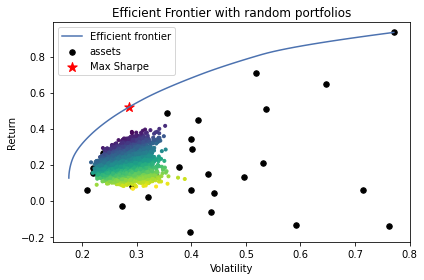

In [44]:
portfolio = selectAssets(data, 30, 'km')
Portfolio_Optimization(portfolio)
Discrete_Allocation(portfolio)
plot(portfolio)

{'PWR': 0.28, 'COST': 0.13, 'FICO': 0.01, 'NVDA': 0.17, 'MCK': 0.28, 'ENPH': 0.11, 'TSLA': 0.04}
Number of Assets: 7
Expected annual return: 50.3%
Annual volatility: 27.7%
Sharpe Ratio: 1.75
Discrete allocation: {'PWR': 6, 'COST': 1, 'NVDA': 2, 'MCK': 3, 'ENPH': 3, 'TSLA': 1}
Funds Remaining: 20.84


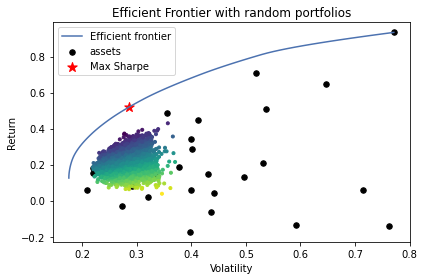

In [45]:
portfolio = selectAssets(data, 30, 'km')
Portfolio_Optimization(portfolio, method = 'CLA')
Discrete_Allocation(portfolio, method = 'CLA')
plot(portfolio)

{'COST': 0.1, 'PWR': 0.29, 'MCK': 0.28, 'NVDA': 0.2, 'ENPH': 0.12}
Number of Assets: 5
Expected annual return: 52.0%
Annual volatility: 28.7%
Sharpe Ratio: 1.74
Discrete allocation: {'COST': 1, 'PWR': 6, 'MCK': 3, 'NVDA': 2, 'ENPH': 5}
Funds Remaining: 5.04


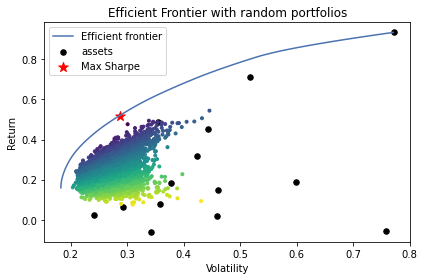

In [46]:
# best n_clust based on Silhouette Score
portfolio = selectAssets(data, 18, 'km')
Portfolio_Optimization(portfolio)
Discrete_Allocation(portfolio)
plot(portfolio)

{'LLY': 0.38, 'COST': 0.04, 'NVDA': 0.16, 'PWR': 0.27, 'ENPH': 0.1, 'TSLA': 0.05}
Number of Assets: 6
Expected annual return: 52.8%
Annual volatility: 27.7%
Sharpe Ratio: 1.83
Discrete allocation: {'LLY': 3, 'NVDA': 2, 'PWR': 6, 'ENPH': 4, 'TSLA': 1, 'VTRS': 2}
Funds Remaining: 167.3


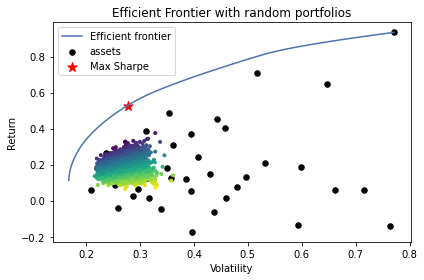

In [47]:
# best n_clust based on Silhouette Score
portfolio = selectAssets(data, 40, 'km')
Portfolio_Optimization(portfolio)
Discrete_Allocation(portfolio)
plot(portfolio)

{'PWR': 0.28, 'MCK': 0.28, 'COST': 0.09, 'FICO': 0.0, 'NVDA': 0.18, 'ENPH': 0.12, 'TSLA': 0.04}
Number of Assets: 7
Expected annual return: 52.0%
Annual volatility: 28.6%
Sharpe Ratio: 1.75
Discrete allocation: {'PWR': 6, 'MCK': 3, 'COST': 1, 'NVDA': 2, 'ENPH': 3, 'TSLA': 1}
Funds Remaining: 20.84


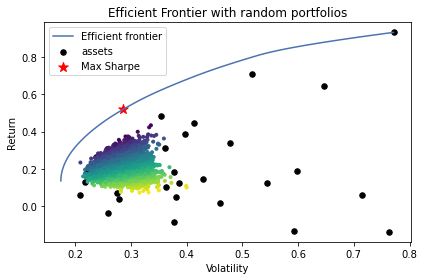

In [48]:
portfolio = selectAssets(data, 30, 'hc')
Portfolio_Optimization(portfolio)
Discrete_Allocation(portfolio)
plot(portfolio)

{'PWR': 0.29, 'COST': 0.1, 'NVDA': 0.2, 'MCK': 0.28, 'ENPH': 0.12}
Number of Assets: 5
Expected annual return: 52.0%
Annual volatility: 28.7%
Sharpe Ratio: 1.74
Discrete allocation: {'PWR': 6, 'COST': 1, 'NVDA': 2, 'MCK': 3, 'ENPH': 5}
Funds Remaining: 5.04


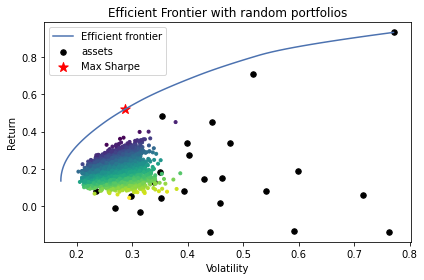

In [49]:
portfolio = selectAssets(data)
Portfolio_Optimization(portfolio)
Discrete_Allocation(portfolio)
plot(portfolio)

In [212]:
import cvxpy as cp

def transaction_cost_objective(w, S, **kwargs):
    # Extract transaction_cost_pct from kwargs
    transaction_cost_pct = kwargs["transaction_cost_pct"]
    # Calculate the transaction cost term
    transaction_cost = transaction_cost_pct * cp.sum(cp.abs(w - 0.5))
    # Return the total objective function value
    return w @ S @ w + transaction_cost




def Portfolio_Optimization_With_Transaction(portfolio='', method='EfficientFrontier', transaction_cost_pct=0.5):
    if portfolio == '':
        df = dataset
    else:
        portfolio = [x for x in portfolio if x is not None]
        df = dataset.iloc[:, portfolio]

    # Calculate the expected returns and the annualized sample covariance matrix of asset returns
    mu = expected_returns.mean_historical_return(df)
    S = risk_models.sample_cov(df)

    if method == 'CLA':
        ef = CLA(mu, S, solver="ECOS")  # Set the solver here
    else:
        ef = EfficientFrontier(mu, S, solver="ECOS")  # Set the solver here

    # Add the transaction cost objective using a regular function
    ef.add_objective(transaction_cost_objective, S=S, transaction_cost_pct=transaction_cost_pct)

    # Optimize for max sharpe ratio
    weights = ef.max_sharpe()

    cleaned_weights = ef.clean_weights()
    cleaned_weights = {asset: round(weight, 2) for asset, weight in weights.items() if weight > 0.01}
    #print(cleaned_weights) 
    print('Number of Assets:',  len(cleaned_weights))
    ef.portfolio_performance(verbose=True)

In [213]:
portfolio = selectAssets(data)
Portfolio_Optimization(portfolio)
Portfolio_Optimization_With_Transaction(portfolio)

{'PWR': 0.29, 'COST': 0.1, 'NVDA': 0.2, 'MCK': 0.28, 'ENPH': 0.12}
Number of Assets: 5
Expected annual return: 52.0%
Annual volatility: 28.7%
Sharpe Ratio: 1.74
Number of Assets: 11
Expected annual return: 26.1%
Annual volatility: 18.9%
Sharpe Ratio: 1.27


In [221]:
portfolio = selectAssets(data, 18, 'km')
Portfolio_Optimization(portfolio)
Portfolio_Optimization_With_Transaction(portfolio)

{'COST': 0.1, 'PWR': 0.29, 'MCK': 0.28, 'NVDA': 0.2, 'ENPH': 0.12}
Number of Assets: 5
Expected annual return: 52.0%
Annual volatility: 28.7%
Sharpe Ratio: 1.74
Number of Assets: 10
Expected annual return: 30.1%
Annual volatility: 21.0%
Sharpe Ratio: 1.34


In [218]:
Portfolio_Optimization()
Portfolio_Optimization_With_Transaction()

{'BLDR': 0.11, 'CMG': 0.04, 'ENPH': 0.08, 'LLY': 0.3, 'MCK': 0.13, 'MRNA': 0.05, 'NVDA': 0.1, 'PWR': 0.17, 'TSLA': 0.03}
Number of Assets: 9
Expected annual return: 51.6%
Annual volatility: 26.1%
Sharpe Ratio: 1.90
Number of Assets: 24
Expected annual return: 16.5%
Annual volatility: 14.5%
Sharpe Ratio: 1.00
